In [1]:
# example_notebook.ipynb
from orca_tools import OrcaNotebookCalculator, OrcaConfig

In [2]:
XC = 'B3LYP'
Basis = '6-31G'
Nroot = 3
Charge = 0
Multiplicity = 1
Geom = '''
C  1.29014502  -0.00000000  -0.72072889  
C  0.00000000  0.00000000  0.07701340  
C  -1.29014502  -0.00000000  -0.72072889  
O  0.00000000  0.00000000  1.29570905  
H  -2.15098489  -0.00000000  -0.04550817  
H  -1.33345511  0.88156093  -1.37731159  
H  -1.33345511  -0.88156093  -1.37731159  
H  1.33345511  0.88156093  -1.37731159  
H  2.15098489  -0.00000000  -0.04550817  
H  1.33345511  -0.88156093  -1.37731159  
'''

Working directory: orca_work
Generated ORCA input:
!B3LYP 6-31G*
%tddft
  nroots 3
end
*xyz 0 1
C  1.29014502  -0.00000000  -0.72072889  
C  0.00000000  0.00000000  0.07701340  
C  -1.29014502  -0.00000000  -0.72072889  
O  0.00000000  0.00000000  1.29570905  
H  -2.15098489  -0.00000000  -0.04550817  
H  -1.33345511  0.88156093  -1.37731159  
H  -1.33345511  -0.88156093  -1.37731159  
H  1.33345511  0.88156093  -1.37731159  
H  2.15098489  -0.00000000  -0.04550817  
H  1.33345511  -0.88156093  -1.37731159
*

Running ORCA calculation in orca_work
orca_work/orca.out
Using eV units
Cannot read the paras.inp file ... 
    taking the line width parameter from the command line 
Number of peaks            ...   3
Start energy [eV]          ...     1.50
Stop energy [eV]           ...    13.50
Peak FWHM [eV]             ...     0.50
Number of points           ...   1024


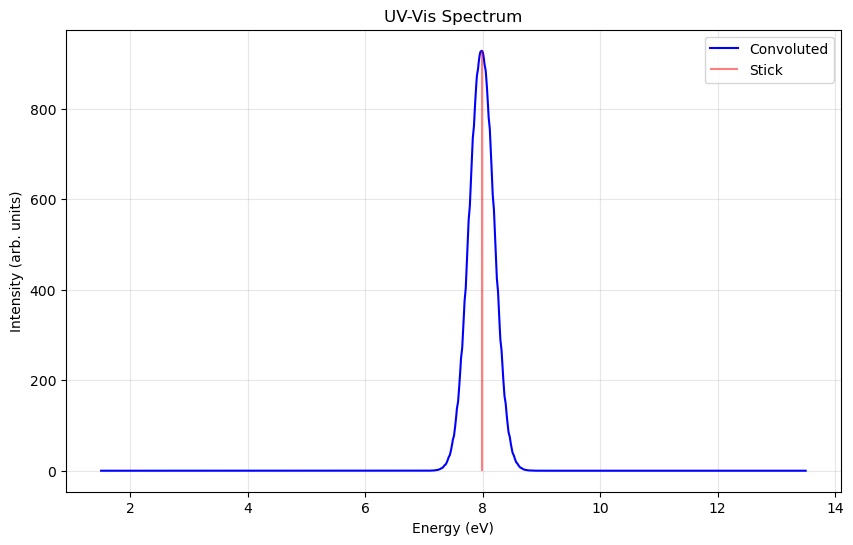

In [ ]:
# Set up calculator with a specific working directory
config = OrcaConfig(
    work_dir=None,
    verbose=True
)

with OrcaNotebookCalculator(config=config, orca_path = "/work/home/huangm/source/orca_6_0_0_shared_openmpi416/") as calc:
    # Run calculation
    input_content = calc.generate_input(
        xc=XC,
        basis=Basis,
        nroot=Nroot,
        charge=Charge,
        multiplicity=Multiplicity,
        geometry=Geom
    )
    
    inp_file, out_file = calc.run_calculation(input_content)

    print(out_file)
    
    # Generate spectrum - this will preserve the files
    spectrum_data = calc.generate_spectrum(out_file, type = "abs", unit = "eV",  start_point=1.5, end_point =13.5)
    
    # Plot spectrum - files are guaranteed to exist
    calc.plot_spectrum()
    
    # Optionally save everything to a permanent location
    #calc.save_working_dir("./permanent_results")